## What is Clustering? 

Clustering is a branch of unsupervised learning. Unsupervised learning is the technique of learning the patters from the data without the help of any labels or assistance. If you would have learned about supervised learning, you will know that those machine learning models need to get trained on a training data to make the predictions. But in unsupervised learning, there is no need for training the model. The model will learn on its own by finding the common patterns amongst the data. 


Clustering is a technique that involves grouping of several similar data points. We can use clustering to classify each data point into a specific group. Data points that are in the same group should exhibit similar features while data points in different groups exhibit dissimilar features and properties. 

## How do evaluate the performance of unsupervised learning models? 

As the unsupervised models don't train, how do we evaluate its performance? There is no answer for it. We cannot evaluate the performance of unsupervised models. Hence, there are huge possibility for the model to have more errors or scope for correction. But we can use our business sense to judge if our predictions are good or not.  

## Using the Elbow method for choosing the best value of K

#### What is the meaning of K in K-means clustering? 

The K in K-means clustering is the number of clusters we want in a dataset. Before implementing the K-means algorithm, we must find out the optimal value for K. Because if we don't find the optimal number of clusters that is K, we might end up with wrong results. But how are we going to find this optimal number of clusters or the K?

For finding the best or optimal value of K in k-means clustering, we use the method called elbow method. 

The elbow method is a heuristic used in determining the number of optimum clusters in a data set. 


This Method Helps us to find out the Optimum Number of Clusters in a Data set. 


We plot the explained variation against the number of clusters and finally pick the elbow of the curve as the number of clusters to use. What if we have multiple elbows in a curve? We have to pick the last elbow


In the Elbow method, we are actually varying the number of clusters (K) from 1 – 10. For each value of K, we are calculating WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. 

## K-Means Algorithm

- K Means algorithm is a Centroid Based Algorithm.


- It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different as       possible.


- It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid is minimum. 


- The less variation we have within clusters, the more homogeneous the data points are within the same cluster.


## Mall Customers Clustering Analysis

#### The problem is to find a distinct groups of customers present in the mall data

#### Which of the characteristics of customers should be chosen for creating clusters? Annual Income and Spending Score


In [1]:
import warnings

warnings.filterwarnings("ignore")

from sklearn.metrics import silhouette_score

In [2]:
# for basic mathematics operation 
import numpy as np

# for dataframe manipulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Importing the dataset 


data = pd.read_csv("Mall_Customers.csv")

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.size

1000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Descriptive Statistics

In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# Describing the categorical data

data.describe(include = 'object')

,Gender
count,200
unique,2
top,Female
freq,112


In [9]:
# Checking for any missing values

data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Visualizing the relationship between the Annual Income and Spending Score Using Scatterplot

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

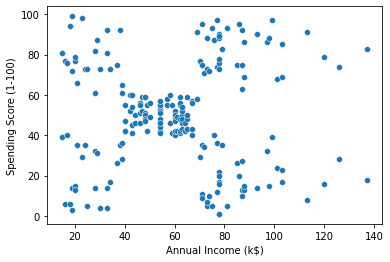

In [10]:
sns.scatterplot(data["Annual Income (k$)"], data["Spending Score (1-100)"])

In [11]:
## We are creating a set of data only with two columns that we are going to use for clustering 

x = data.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values


## Lets check the shape of x

print(x.shape)

(200, 2)


In [12]:
# lets also check the data, which we are going to use for the clustering analysis
x_data  = pd.DataFrame(x)
x_data.head()
# where o->Spending Score, and 1->Annual Income

,0,1
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## K-means algorithm

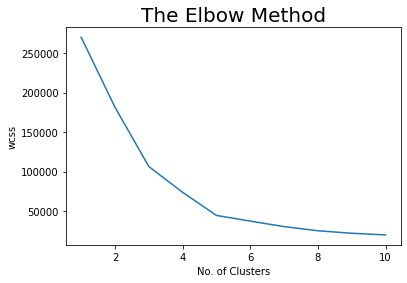

In [13]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
X = x_data.iloc[:,:].values
km = KMeans(n_clusters=5)
y_means = km.fit_predict(X)

In [15]:
y_means # What are the clusters for which each customer in a mall is assigned to

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [16]:
X # The exact values of the annual income and spending as an array

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [17]:
X[y_means == 0] # Fetch in the details of all points or customers who belongs to cluster 0

array([[ 69,  91],
       [ 70,  77],
       [ 71,  95],
       [ 71,  75],
       [ 71,  75],
       [ 72,  71],
       [ 73,  88],
       [ 73,  73],
       [ 74,  72],
       [ 75,  93],
       [ 76,  87],
       [ 77,  97],
       [ 77,  74],
       [ 78,  90],
       [ 78,  88],
       [ 78,  76],
       [ 78,  89],
       [ 78,  78],
       [ 78,  73],
       [ 79,  83],
       [ 81,  93],
       [ 85,  75],
       [ 86,  95],
       [ 87,  63],
       [ 87,  75],
       [ 87,  92],
       [ 88,  86],
       [ 88,  69],
       [ 93,  90],
       [ 97,  86],
       [ 98,  88],
       [ 99,  97],
       [101,  68],
       [103,  85],
       [103,  69],
       [113,  91],
       [120,  79],
       [126,  74],
       [137,  83]], dtype=int64)

In [18]:
X[y_means == 1] # Fetch in the details of all points or customers who belongs to cluster 1

array([[39, 61],
       [40, 55],
       [40, 47],
       [40, 42],
       [40, 42],
       [42, 52],
       [42, 60],
       [43, 54],
       [43, 60],
       [43, 45],
       [43, 41],
       [44, 50],
       [44, 46],
       [46, 51],
       [46, 46],
       [46, 56],
       [46, 55],
       [47, 52],
       [47, 59],
       [48, 51],
       [48, 59],
       [48, 50],
       [48, 48],
       [48, 59],
       [48, 47],
       [49, 55],
       [49, 42],
       [50, 49],
       [50, 56],
       [54, 47],
       [54, 54],
       [54, 53],
       [54, 48],
       [54, 52],
       [54, 42],
       [54, 51],
       [54, 55],
       [54, 41],
       [54, 44],
       [54, 57],
       [54, 46],
       [57, 58],
       [57, 55],
       [58, 60],
       [58, 46],
       [59, 55],
       [59, 41],
       [60, 49],
       [60, 40],
       [60, 42],
       [60, 52],
       [60, 47],
       [60, 50],
       [61, 42],
       [61, 49],
       [62, 41],
       [62, 48],
       [62, 59],
       [62, 55

In [19]:
X[y_means == 2] # Fetch in the details of all points or customers who belongs to cluster 2

array([[15, 81],
       [16, 77],
       [17, 76],
       [18, 94],
       [19, 72],
       [19, 99],
       [20, 77],
       [20, 79],
       [21, 66],
       [23, 98],
       [24, 73],
       [25, 73],
       [28, 82],
       [28, 61],
       [29, 87],
       [30, 73],
       [33, 92],
       [33, 81],
       [34, 73],
       [37, 75],
       [38, 92],
       [39, 65]], dtype=int64)

In [20]:
X[y_means == 3] # Fetch in the details of all points or customers who belongs to cluster 3

array([[ 70,  29],
       [ 71,  11],
       [ 71,   9],
       [ 73,   5],
       [ 73,   7],
       [ 74,  10],
       [ 75,   5],
       [ 77,  12],
       [ 77,  36],
       [ 78,  22],
       [ 78,  17],
       [ 78,  20],
       [ 78,  16],
       [ 78,   1],
       [ 78,   1],
       [ 79,  35],
       [ 81,   5],
       [ 85,  26],
       [ 86,  20],
       [ 87,  27],
       [ 87,  13],
       [ 87,  10],
       [ 88,  13],
       [ 88,  15],
       [ 93,  14],
       [ 97,  32],
       [ 98,  15],
       [ 99,  39],
       [101,  24],
       [103,  17],
       [103,  23],
       [113,   8],
       [120,  16],
       [126,  28],
       [137,  18]], dtype=int64)

In [21]:
X[y_means == 4] # Fetch in the details of all points or customers who belongs to cluster 4

array([[15, 39],
       [16,  6],
       [17, 40],
       [18,  6],
       [19,  3],
       [19, 14],
       [20, 15],
       [20, 13],
       [21, 35],
       [23, 29],
       [24, 35],
       [25,  5],
       [28, 14],
       [28, 32],
       [29, 31],
       [30,  4],
       [33,  4],
       [33, 14],
       [34, 17],
       [37, 26],
       [38, 35],
       [39, 36],
       [39, 28]], dtype=int64)

In [22]:
X[y_means == 0].shape

(39, 2)

In [23]:
X[y_means == 0].ndim

2

In [67]:
X[y_means == 0,0] # This is a two dimensional array. So, the second element will be giving the columns

# And the first element will be giving the rows (Y axis values of all the customers in the cluster 0)

array([ 69,  70,  71,  71,  71,  72,  73,  73,  74,  75,  76,  77,  77,
        78,  78,  78,  78,  78,  78,  79,  81,  85,  86,  87,  87,  87,
        88,  88,  93,  97,  98,  99, 101, 103, 103, 113, 120, 126, 137],
      dtype=int64)

In [25]:
X[y_means == 0,1] # This gives me all the x -axis values of customers in the cluster 0

array([91, 77, 95, 75, 75, 71, 88, 73, 72, 93, 87, 97, 74, 90, 88, 76, 89,
       78, 73, 83, 93, 75, 95, 63, 75, 92, 86, 69, 90, 86, 88, 97, 68, 85,
       69, 91, 79, 74, 83], dtype=int64)

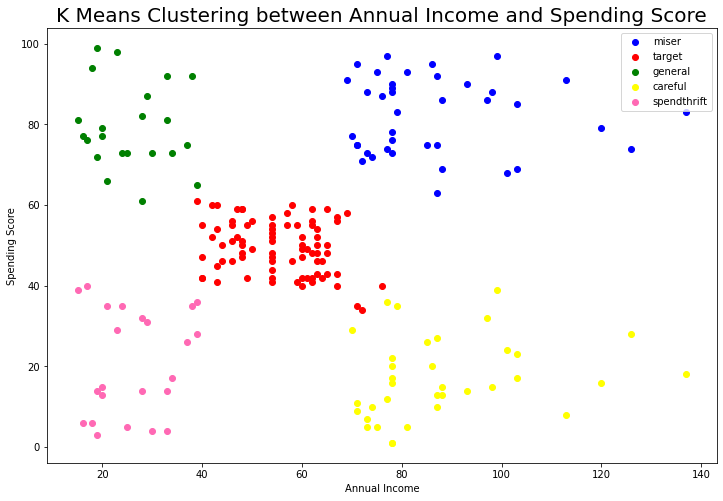

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(X[y_means==0,0],X[y_means==0,1], color="blue", label = "miser")
plt.scatter(X[y_means==1,0],X[y_means==1,1], color="red", label = "target")
plt.scatter(X[y_means==2,0],X[y_means==2,1], color="green", label = "general")
plt.scatter(X[y_means==3,0],X[y_means==3,1], color="yellow", label = "careful")
plt.scatter(X[y_means==4,0],X[y_means==4,1], color="hotpink", label = "spendthrift")

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("K Means Clustering between Annual Income and Spending Score", fontsize = 20)
plt.legend()
plt.show()

In [27]:
score = silhouette_score(X, y_means, metric = "euclidean")

print("Silhouette Score: %.3f" % score)

Silhouette Score: 0.554


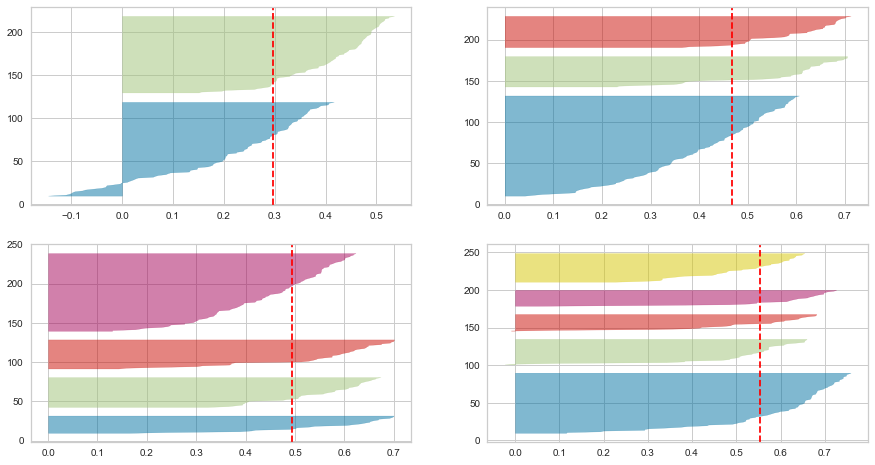

In [28]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

## Clustering between age and spending score

In [29]:
a = data.loc[:,["Age", "Spending Score (1-100)"]].values

a.shape

(200, 2)

In [30]:
a

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [31]:
# lets also check the data, which we are going to use for the clustering analysis
a_data  = pd.DataFrame(a)
a_data.head()
# where o->Age, and 1->Spending Score

,0,1
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


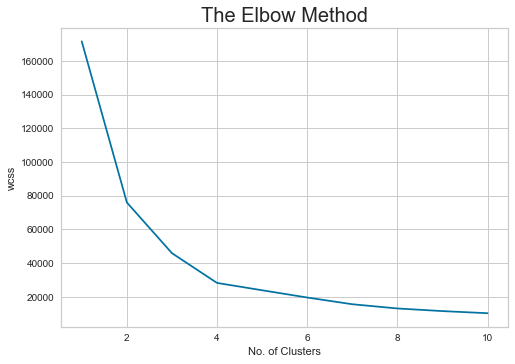

In [32]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(a)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [33]:
A = a_data.iloc[:,:].values
km = KMeans(n_clusters=4)
b_means = km.fit_predict(A)

In [34]:
b_means # What are the clusters for which each customer in a mall is assigned to

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [35]:
A # The exact values of the age and spending as an array

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [36]:
A[b_means==0]

array([[20,  6],
       [35,  6],
       [64,  3],
       [67, 14],
       [58, 15],
       [37, 13],
       [52, 29],
       [46,  5],
       [54, 14],
       [45, 32],
       [40, 31],
       [60,  4],
       [53,  4],
       [49, 14],
       [42, 17],
       [36, 26],
       [49, 28],
       [59, 11],
       [47,  9],
       [20,  5],
       [44,  7],
       [19, 10],
       [57,  5],
       [25, 12],
       [34, 22],
       [43, 17],
       [44, 20],
       [47, 16],
       [37,  1],
       [34,  1],
       [19,  5],
       [50, 26],
       [42, 20],
       [36, 27],
       [40, 13],
       [36, 10],
       [52, 13],
       [58, 15],
       [59, 14],
       [37, 32],
       [46, 15],
       [54, 24],
       [41, 17],
       [34, 23],
       [33,  8],
       [47, 16],
       [45, 28],
       [32, 18]], dtype=int64)

In [37]:
A[b_means == 1]

array([[21, 81],
       [23, 77],
       [22, 76],
       [23, 94],
       [30, 72],
       [35, 99],
       [24, 77],
       [22, 79],
       [35, 98],
       [25, 73],
       [31, 73],
       [29, 82],
       [23, 87],
       [21, 73],
       [18, 92],
       [21, 81],
       [30, 73],
       [20, 75],
       [24, 92],
       [39, 91],
       [31, 77],
       [40, 95],
       [38, 75],
       [39, 75],
       [31, 71],
       [29, 88],
       [32, 73],
       [35, 72],
       [32, 93],
       [32, 87],
       [28, 97],
       [32, 74],
       [34, 90],
       [39, 88],
       [38, 76],
       [27, 89],
       [30, 78],
       [30, 73],
       [29, 83],
       [31, 93],
       [36, 75],
       [33, 95],
       [28, 75],
       [36, 92],
       [30, 86],
       [27, 69],
       [35, 90],
       [32, 86],
       [29, 88],
       [30, 97],
       [28, 68],
       [36, 85],
       [32, 69],
       [38, 91],
       [35, 79],
       [32, 74],
       [30, 83]], dtype=int64)

In [38]:
A[b_means == 2]

array([[19, 39],
       [31, 40],
       [35, 35],
       [20, 66],
       [35, 35],
       [35, 61],
       [31, 61],
       [24, 65],
       [27, 47],
       [29, 42],
       [31, 42],
       [33, 60],
       [31, 54],
       [27, 51],
       [19, 55],
       [18, 59],
       [19, 59],
       [32, 47],
       [26, 54],
       [40, 48],
       [23, 52],
       [38, 55],
       [21, 57],
       [22, 55],
       [34, 60],
       [18, 41],
       [40, 40],
       [32, 42],
       [24, 52],
       [27, 50],
       [20, 49],
       [23, 41],
       [26, 55],
       [21, 42],
       [19, 54],
       [38, 42],
       [19, 46],
       [18, 48],
       [19, 50],
       [27, 56],
       [38, 40],
       [40, 58],
       [23, 29],
       [25, 34],
       [28, 40],
       [32, 63],
       [41, 39]], dtype=int64)

In [39]:
A[b_means == 3]

array([[65, 35],
       [48, 36],
       [50, 55],
       [49, 52],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [53, 46],
       [70, 56],
       [67, 52],
       [54, 59],
       [63, 51],
       [43, 50],
       [68, 48],
       [70, 55],
       [47, 42],
       [60, 49],
       [60, 56],
       [59, 47],
       [45, 53],
       [49, 42],
       [57, 51],
       [67, 41],
       [46, 44],
       [48, 46],
       [55, 58],
       [50, 46],
       [68, 55],
       [48, 49],
       [47, 47],
       [48, 42],
       [49, 48],
       [67, 59],
       [49, 56],
       [66, 50],
       [54, 46],
       [68, 43],
       [66, 48],
       [65, 52],
       [63, 43],
       [49, 59],
       [51, 43],
       [50, 57],
       [43, 35],
       [48, 36],
       [56, 35]], dtype=int64)

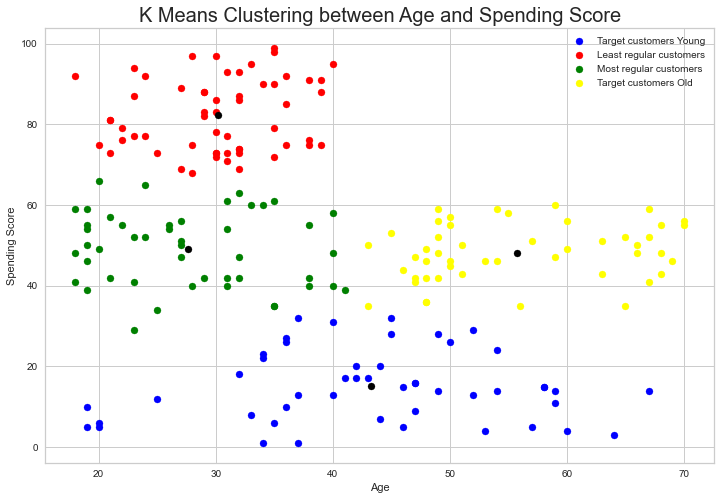

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(A[b_means==0,0],A[b_means==0,1], color="blue", label = "Target customers Young")
plt.scatter(A[b_means==1,0],A[b_means==1,1], color="red", label = "Least regular customers")
plt.scatter(A[b_means==2,0],A[b_means==2,1], color="green", label = "Most regular customers")
plt.scatter(A[b_means==3,0],A[b_means==3,1], color="yellow", label = "Target customers Old")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c = 'black')


plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("K Means Clustering between Age and Spending Score", fontsize = 20)
plt.legend()
plt.show()

## Silhouette Value 

A silhouette value measures how similar a point is to its own cluster (cohesion), compared to other clusters (separation)


The range of silhouette value is between +1 and -1. A high value is desirable and indicates that the point is placed in the correct cluster. If many points have a negative cluster, we may indicate that we have created too many or too few clusters.




It measures the quality of a clustering. That is, it determines how well each object lies within its cluster. 


The optimal number of clusters k is the one that maximizes the average silhouette over a range of possible values for k.


- Silhouette values lie in the range of -1 and  1. The Value of +1 is ideal and -1 is least preferred.


- Value of +1 indicates that the sample is far away from its neighbouring cluster and very close to the cluster it is assigned. 


- Value of -1 indicates that the point is close to its neighbouring cluster than to the cluster its assigned.


- Value of 0 means it's at the boundary of the distance between the two clusters.


In [41]:
from sklearn.metrics import silhouette_score

In [42]:
score = silhouette_score(A, b_means, metric = "euclidean")

print("Silhouette Score: %.3f" % score)

Silhouette Score: 0.500


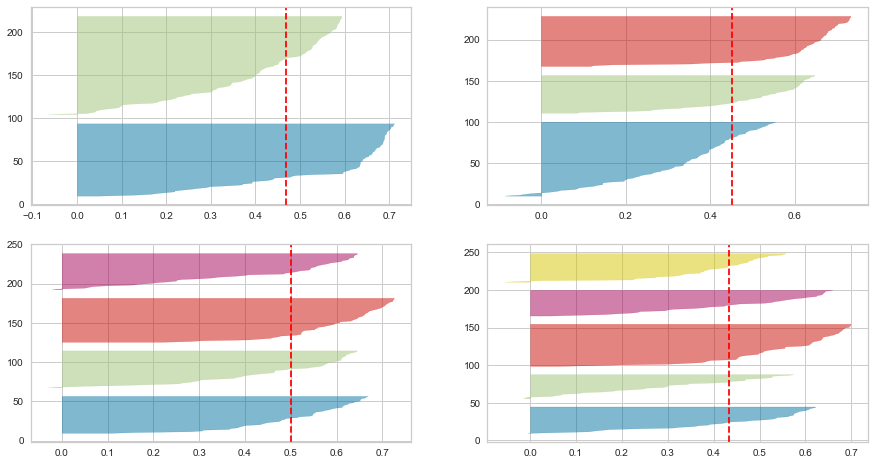

In [43]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(A) 

## Clustering Multiple Dimensions

In [44]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
a = data.loc[:,["Age", "Annual Income (k$)", "Spending Score (1-100)"]].values


print(a.shape)

(200, 3)


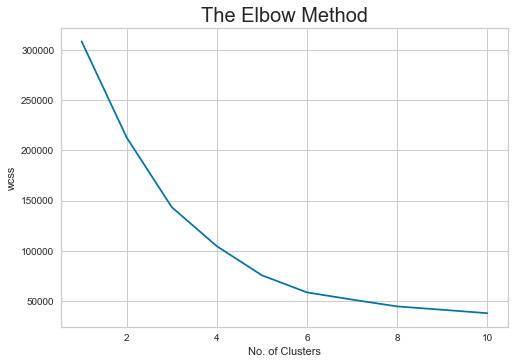

In [46]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(a)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [47]:
# Performing k-means clustering analysis 

km = KMeans(n_clusters=6)
b_means = km.fit_predict(a)

In [48]:
b_means = pd.DataFrame(b_means)
df = pd.concat([data, b_means], axis = 1)
df = df.rename(columns = {0: "Clusters"})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


In [49]:
print("Customer IDs for cluster 1: ", df[df["Clusters"]==0]["CustomerID"].values)
print("Customer IDs for cluster 2: ", df[df["Clusters"]==1]["CustomerID"].values)
print("Customer IDs for cluster 3: ", df[df["Clusters"]==2]["CustomerID"].values)
print("Customer IDs for cluster 4: ", df[df["Clusters"]==3]["CustomerID"].values)
print("Customer IDs for cluster 5: ", df[df["Clusters"]==4]["CustomerID"].values)
print("Customer IDs for cluster 6: ", df[df["Clusters"]==5]["CustomerID"].values)

Customer IDs for cluster 1:  [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
Customer IDs for cluster 2:  [127 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
Customer IDs for cluster 3:  [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
Customer IDs for cluster 4:  [ 41  43  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72
  73  74  75  77  80  81  83  84  86  87  90  91  93  97  99 102 103 105
 107 108 109 110 111 117 118 119 120]
Customer IDs for cluster 5:  [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 45]
Customer IDs for cluster 6:  [ 44  48  49  50  52  53  59  62  66  69  70  76  78  79  82  85  88  89
  92  94  95  96  98 100 101 104 106 112 113 114 115 116 121 122 123 125
 133 143]


## Hierarchical, Agglomerative and Density-based Clustering

In [50]:
customer_data = pd.read_csv("Mall_Customers.csv")
customer_data.shape

(200, 5)

In [51]:
data = customer_data.iloc[:,3:5].values
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

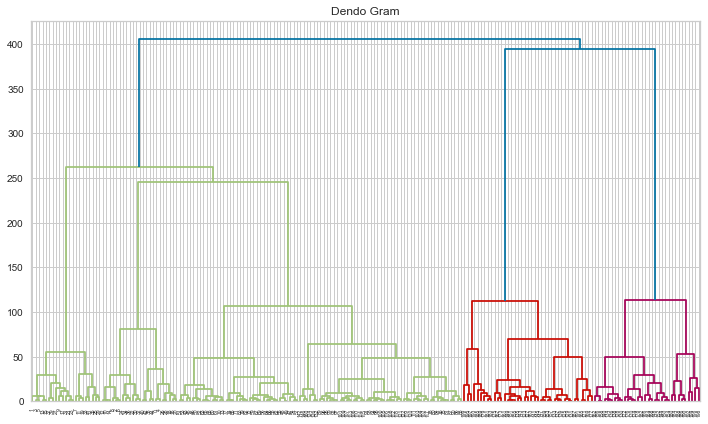

In [52]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(12,7))
plt.title("Dendo Gram")
dend =  shc.dendrogram(shc.linkage(data, method = "ward"))

In [53]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage= "ward")
labels = cluster.fit_predict(data)

labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

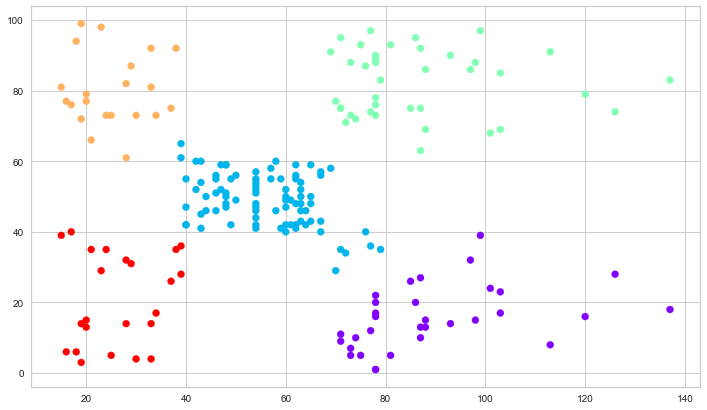

In [54]:
plt.figure(figsize=(12,7))
plt.scatter(data[:,0], data[:,1], c = cluster.labels_, cmap="rainbow")
plt.show()

## How do we find out the optimal number of clusters from a dendogram?

We draw a horizontal line through the linkages that are the longest. The cluster that cuts the maximum number of lines is the optimally chosen number of clusters.

Whenever the data is in spherical shape, K-means algorithm is used. Whereas hierarchical clustering is used for social networking methods


## K-Means vs Hierarchical 


As we know, clustering is a subjective statistical analysis, and there is more than one appropriate algorithm for every dataset and type of problem. So how to choose between K-means and hierarchical?

- 1. If there is a specific number of clusters in the dataset, but the group they belong to is unknown, choose K-means
- 2. If the distinguishes are based on prior beliefs, hierarchical clustering should be used to know the number of clusters
- 3. With a large number of variables, K-means compute faster 
- 4. The result of K-means is unstructured, but that of hierarchal is more interpretable and informative
- 5. It is easier to determine the number of clusters by hierarchical clustering’s dendrogram

## DBSCAN -  Density Based Clustering

K-means and hierarchical clustering is quite favorable when we have a rough idea of number of clusters to be there. But what if we have to work on a large sample of data. In this case, it is impossible to determine the optimal number of clusters. 


DBSCAN Clustering algorithm is used when there are huge datasets for which we have to find the optimal number of clusters. The speciality of this DBSCAN clustering is that it does not require the number of clusters in prior as it finds out optimal number of clusters in its own.  

## DBSCAN - Density Based Spatial Clustering of Applications with Noise

DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density. It groups 'densely grouped' data points into a single cluster. It helps find and treat outliers with the points that are in the lower dense regions. 

## Parameters of DBSCAN :


The DBSCAN algorithm basically requires 2 parameters:

- eps: specifies how close, the points should be to each other, to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors. This eps value is considered as a threshold for considering two points as a neighbour.

----------------------------------------------------------------------------------------------------------------


- minPoints: the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region. Generally, the min points is equal to the twice the number of columns in the dataset. 

DBSCAN requires only two parameters: epsilon and minPoints. 

Epsilon is the radius of the circle to be created around each data point to check the density and 


minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.



DBSCAN creates a circle of epsilon radius around every data point and classifies them into Core point, Border point, and Noise. A data point is a Core point if the circle around it contains at least ‘minPoints’ number of points. If the number of points is less than minPoints, then it is classified as Border Point, and if there are no other data points around any data point within epsilon radius, then it treated as Noise.



Core Point: A point is a core point if it has more than MinPts points within eps. Border Point: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point. Noise or outlier: A point which is not a core point or border point.

In [57]:
data = pd.read_csv("Mall_Customers.csv")

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
## We are creating a set of data only with two columns that we are going to use for clustering 

x = data.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values


## Lets check the shape of x

print(x.shape)

(200, 2)


### For determining the value of min samples, we will follow some simple rules

### For 2 dimensional data, use dbscan's default value of minpoints = 4. 

### If data has more than two dimensions, choose Minpoints = 2 * dim (where dim is equal to the dimensions of data set)

### To calculate EPS point parameter, we will calculate the distance from each point to its closest neoighbours using the nearest neighbours



In [59]:
### To calculate EPS point parameter, we will calculate the distance from each point to its closest neighbours 
### using the nearest neighbours

from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)

nbrs = neigh.fit(x)

distances, indices = nbrs.kneighbors(x)

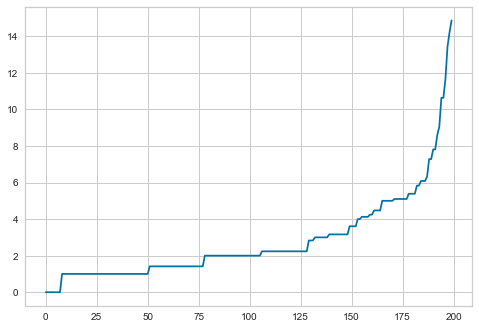

In [60]:
distances = np.sort(distances, axis = 0)

distances = distances[:,1]

plt.plot(distances)

plt.show()

In [61]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps = 8, min_samples = 4)

clusters = dbscan.fit_predict(x)

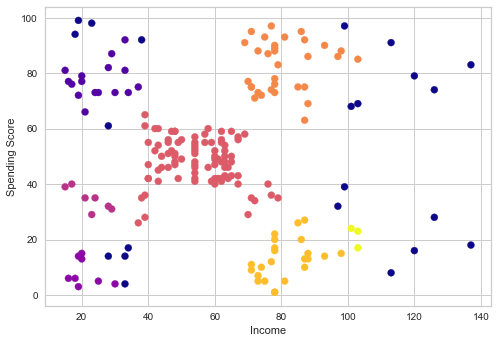

In [62]:
# Plot the clustering of DBSCAN 


plt.scatter(x[:,0], x[:,1], c = clusters, cmap = "plasma")

plt.xlabel("Income")

plt.ylabel("Spending Score")

plt.show()

In [63]:
from sklearn.metrics import silhouette_score

In [64]:
silhouette_score(x,clusters)

0.3888444498053395